In [312]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [348]:
data = pd.read_csv('C:/Users/Kotos/Desktop/bookings.csv', sep=",")
data = data.drop_duplicates()

In [349]:
# Первые 5 строк датасета
data.head()

,hotel,market_segment,deposit_type,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled
0,Resort Hotel,Direct,No Deposit,342,0,0,0,3,0,0
1,Resort Hotel,Direct,No Deposit,737,0,0,0,4,0,0
2,Resort Hotel,Direct,No Deposit,7,0,0,0,0,0,0
3,Resort Hotel,Corporate,No Deposit,13,0,0,0,0,0,0
4,Resort Hotel,Online TA,No Deposit,14,0,0,0,0,1,0


In [350]:
# Размер датасета - строки и колонки
data.shape

(21344, 10)

In [351]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 21344


In [352]:
# Список колонок
data.columns

Index(['hotel', 'market_segment', 'deposit_type', 'lead_time',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'days_in_waiting_list', 'booking_changes', 'total_of_special_requests',
       'is_canceled'],
      dtype='object')

In [353]:
# Список колонок с типами данных
data.dtypes

hotel                             object
market_segment                    object
deposit_type                      object
lead_time                          int64
previous_cancellations             int64
previous_bookings_not_canceled     int64
days_in_waiting_list               int64
booking_changes                    int64
total_of_special_requests          int64
is_canceled                        int64
dtype: object

In [355]:
# Удаление строк, содержащих пустые значения
data = data.dropna(axis=0, how='any')
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

hotel - 0
market_segment - 0
deposit_type - 0
lead_time - 0
previous_cancellations - 0
previous_bookings_not_canceled - 0
days_in_waiting_list - 0
booking_changes - 0
total_of_special_requests - 0
is_canceled - 0


In [356]:
# Основные статистические характеристки набора данных
data.describe()

,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled
count,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000,21344.000000
mean,119.894771,0.109773,0.640695,1.815217,0.689749,0.900768,0.338784
std,103.299224,0.703863,3.407532,15.671428,1.166131,1.009811,0.473307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,189.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
max,737.000000,26.000000,72.000000,391.000000,21.000000,5.000000,1.000000


In [358]:
# Определим уникальные значения для целевого признака
data['is_canceled'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='days_in_waiting_list', ylabel='lead_time'>

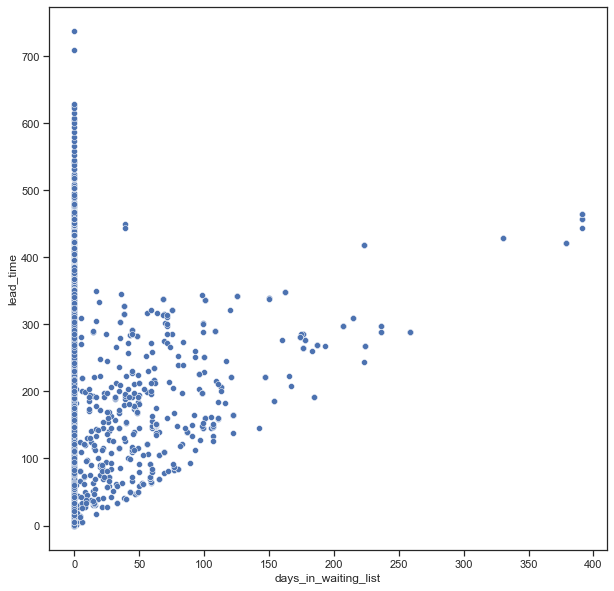

In [359]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='days_in_waiting_list', y='lead_time', data=data)

<AxesSubplot:xlabel='days_in_waiting_list', ylabel='lead_time'>

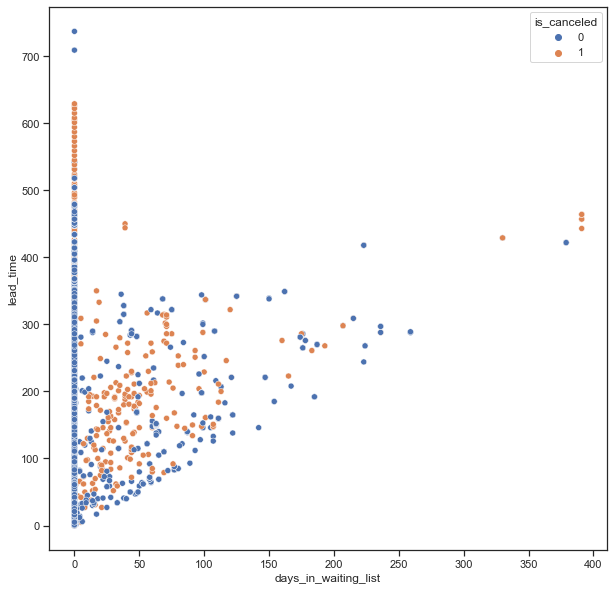

In [360]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='days_in_waiting_list', y='lead_time', data=data, hue='is_canceled')

C:\Users\Kotos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

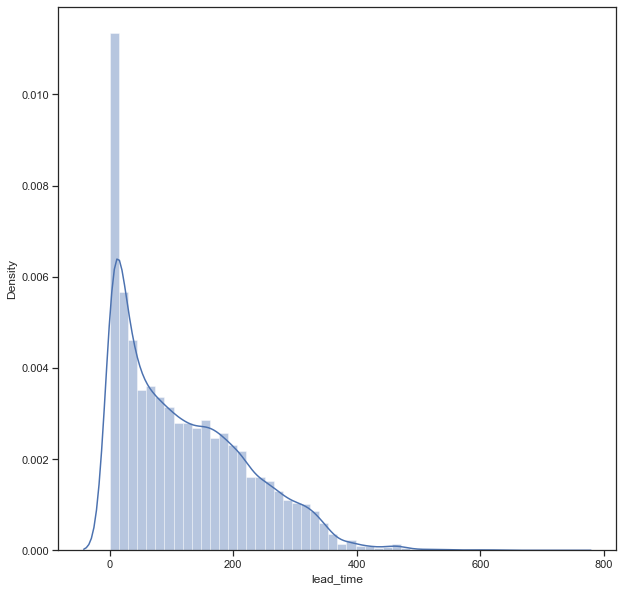

In [392]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['lead_time'])

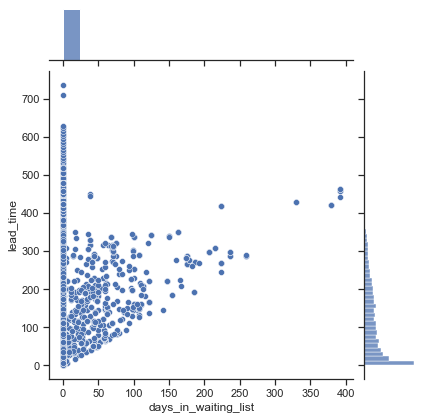

In [394]:
sns.jointplot(x='days_in_waiting_list', y='lead_time', data=data)

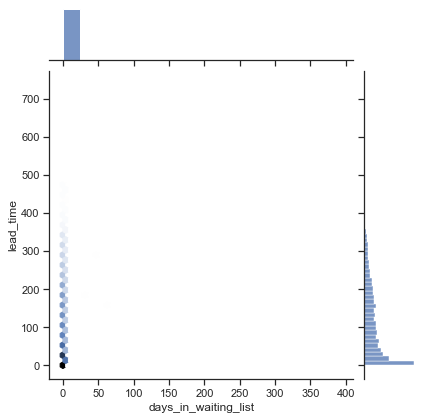

In [363]:
sns.jointplot(x='days_in_waiting_list', y='lead_time', data=data, kind="hex")

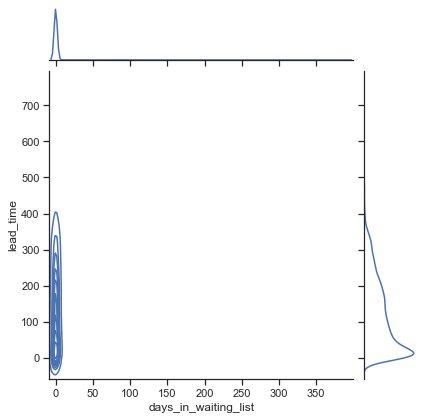

In [364]:
sns.jointplot(x='days_in_waiting_list', y='lead_time', data=data, kind="kde")

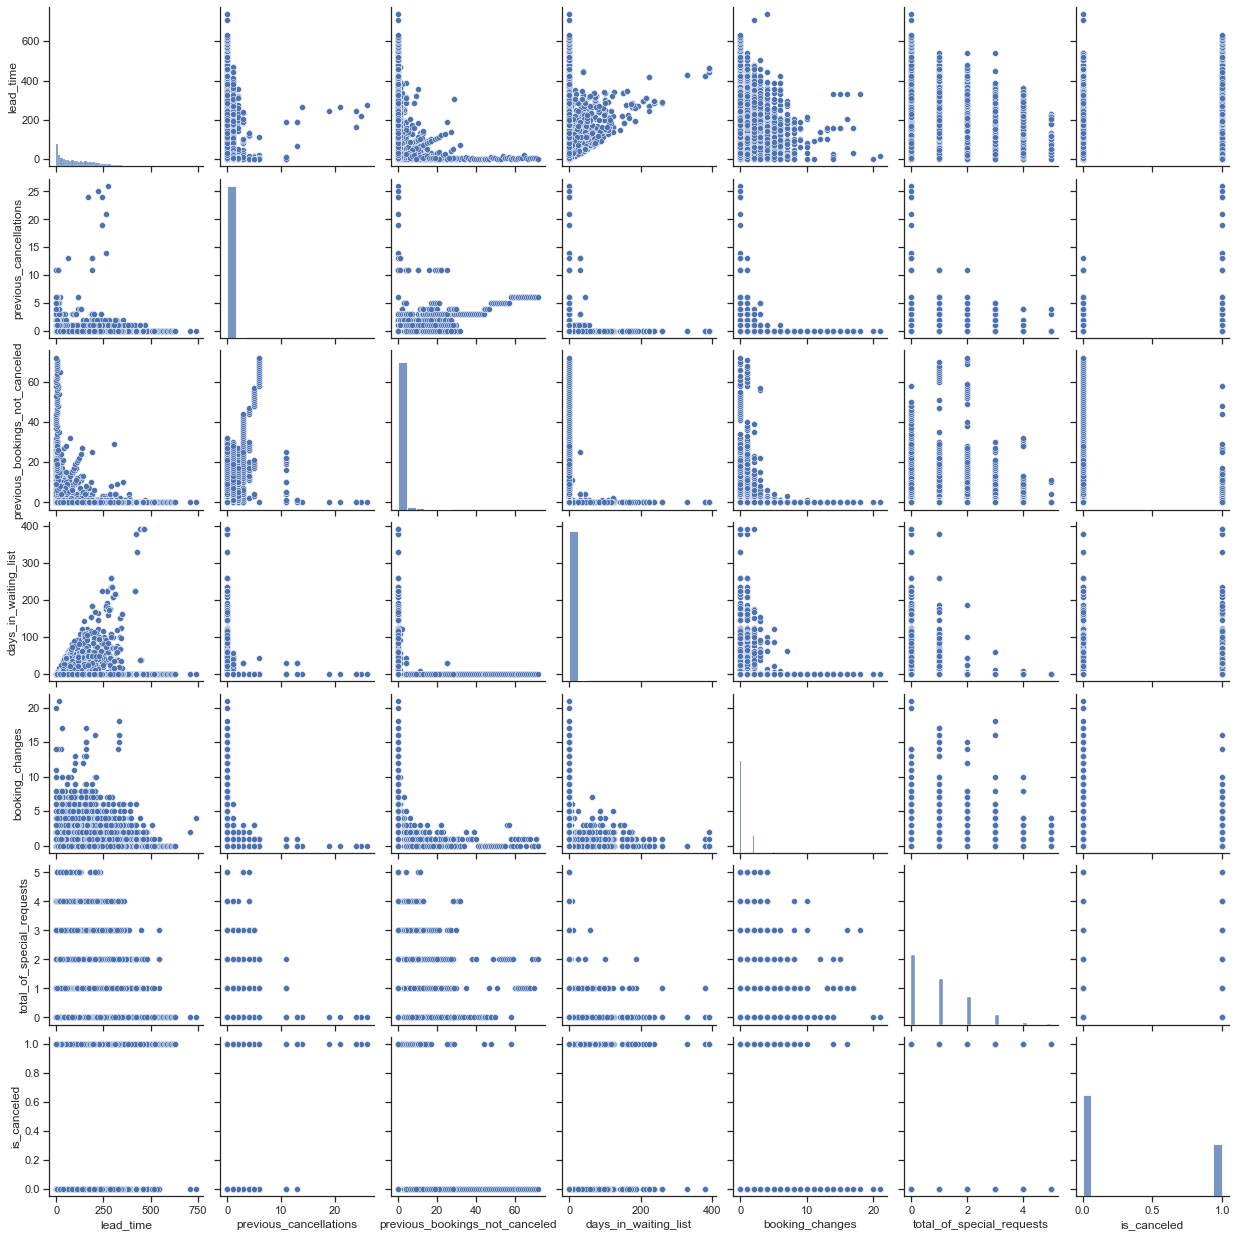

In [357]:
sns.pairplot(data)

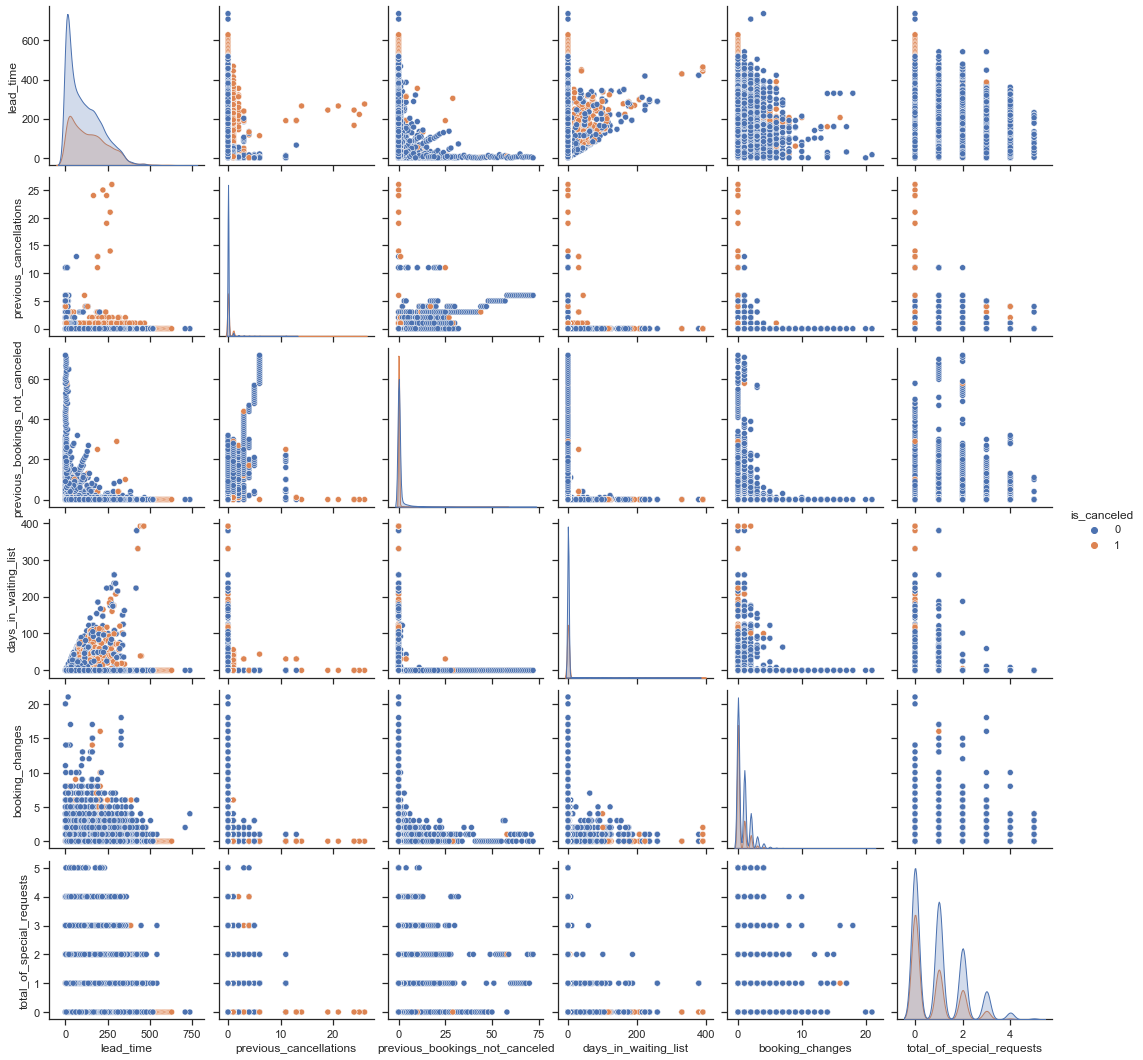

In [365]:
sns.pairplot(data, hue="is_canceled")

<AxesSubplot:xlabel='lead_time'>

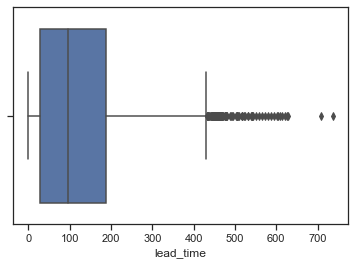

In [372]:
sns.boxplot(x=data['lead_time'])

<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

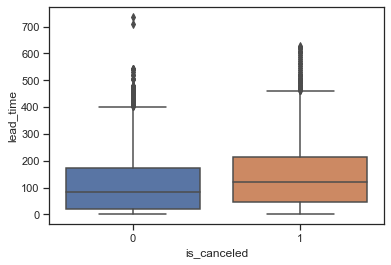

In [373]:
# Распределение параметра lead_time сгруппированные по is_canceled.
sns.boxplot(x='is_canceled', y='lead_time', data=data)

<AxesSubplot:xlabel='lead_time'>

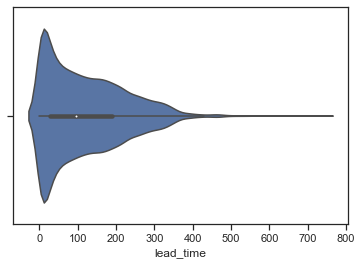

In [375]:
sns.violinplot(x=data['lead_time'])

C:\Users\Kotos\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lead_time', ylabel='Density'>

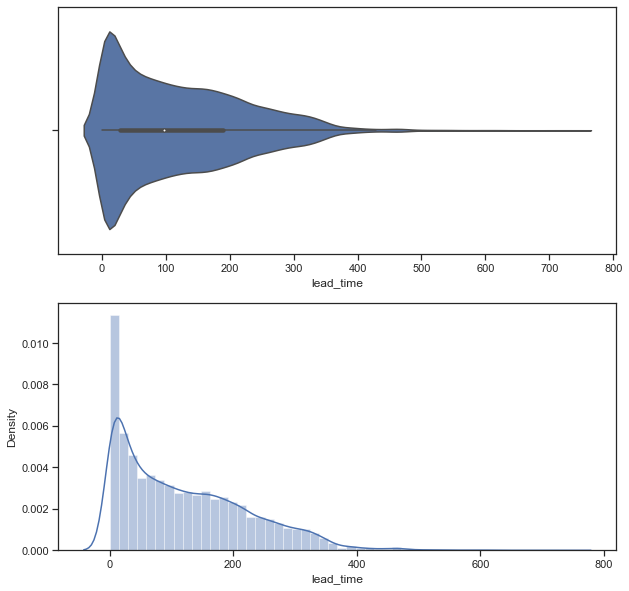

In [376]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['lead_time'])
sns.distplot(data['lead_time'], ax=ax[1])

<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

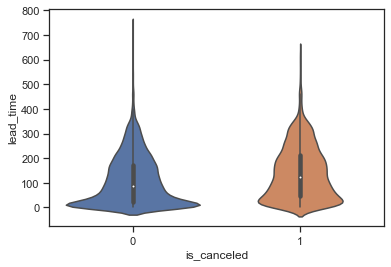

In [377]:
# Распределение параметра lead_time сгруппированные по is_canceled.
sns.violinplot(x='is_canceled', y='lead_time', data=data)

In [382]:
data.corr()

,lead_time,previous_cancellations,previous_bookings_not_canceled,days_in_waiting_list,booking_changes,total_of_special_requests,is_canceled
lead_time,1.000000,-0.059447,-0.185467,0.130215,-0.041682,-0.030895,0.141762
previous_cancellations,-0.059447,1.000000,0.403261,-0.004974,-0.065365,-0.022248,0.058820
previous_bookings_not_canceled,-0.185467,0.403261,1.000000,-0.019782,-0.054892,0.019390,-0.108908
days_in_waiting_list,0.130215,-0.004974,-0.019782,1.000000,-0.013716,-0.083878,0.020985
booking_changes,-0.041682,-0.065365,-0.054892,-0.013716,1.000000,-0.018347,-0.154548
total_of_special_requests,-0.030895,-0.022248,0.019390,-0.083878,-0.018347,1.000000,-0.134837
is_canceled,0.141762,0.058820,-0.108908,0.020985,-0.154548,-0.134837,1.000000


<AxesSubplot:>

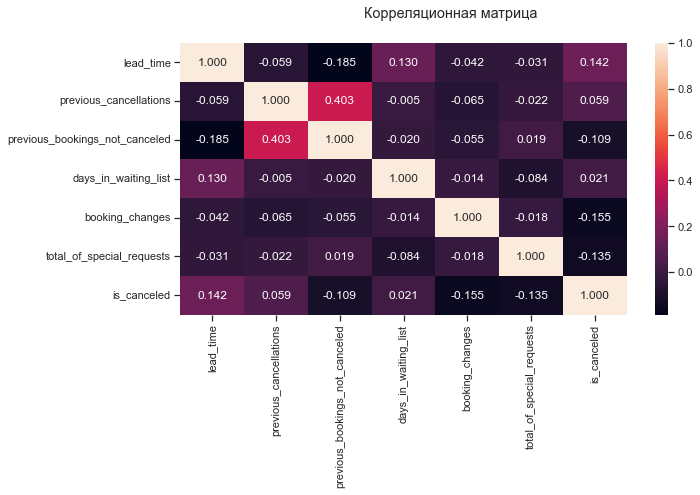

In [391]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')